In [14]:
import math
import random
waypoints = [(0, 0), (1, 1), (2, 0), (3, 1)]  # Example waypoints, starting and ending at the same point
possible_radii = [0.5, 1.0]  # Example radii

In [2]:
class Node:
    def __init__(self, radius_sequence=None, parent=None):
        self.visit_count = 0
        self.value = 0.0
        self.children = {}
        self.waypoint = 0
        self.parent = parent
        self.radius_sequence = radius_sequence if radius_sequence else []

    def ucb1(self, exploration_constant=1.41):
        if self.visit_count == 0:
            return float('inf')
        parent_visits = self.parent.visit_count if self.parent is not None else 1
        return self.value / self.visit_count + exploration_constant * math.sqrt(
            math.log(parent_visits) / self.visit_count)

    def best_child(self):
        return min(self.children.values(), key=lambda node: node.ucb1(), default=None)

    def fully_expanded(self):
        return len(self.radius_sequence) == len(waypoints) - 1  # -1 since the sequence length is one less than waypoints

    def update(self, reward):
        self.visit_count += 1
        self.value += reward
        
    def display(self, indent=0):
        print('  ' * indent + f"Node: {self.radius_sequence}, Value: {self.value}, Visits: {self.visit_count},isits: {self.visit_count}")
    
    def traverse(self, indent=0):
        self.display(indent)
        for child in self.children.values():
            child.traverse(indent + 1)

def expand_node(node):
    # If the node isn't fully expanded
    if not node.fully_expanded():
        # For each possible radius
        for radius in possible_radii:
            # Create a new radius sequence based on the parent's sequence
            new_radius_sequence = node.radius_sequence + [radius]
            child = Node(radius_sequence=new_radius_sequence, parent=node)
            # The key for the children dictionary can be a tuple of the radius sequence
            node.children[tuple(new_radius_sequence)] = child
# Test the new methods
root = Node()
expand_node(root)  # Expand the root node
for child in root.children.values():
    expand_node(child)  # Expand each child node

root.traverse()


Node: [], Value: 0.0, Visits: 0,isits: 0
  Node: [0.5], Value: 0.0, Visits: 0,isits: 0
    Node: [0.5, 0.5], Value: 0.0, Visits: 0,isits: 0
    Node: [0.5, 1.0], Value: 0.0, Visits: 0,isits: 0
  Node: [1.0], Value: 0.0, Visits: 0,isits: 0
    Node: [1.0, 0.5], Value: 0.0, Visits: 0,isits: 0
    Node: [1.0, 1.0], Value: 0.0, Visits: 0,isits: 0


In [3]:
class Node:
    def __init__(self, waypoint_index=None, radius_sequence=None, parent=None):
        self.visit_count = 0
        self.value = 0.0
        self.children = {}
        self.parent = parent
        self.waypoint_index = waypoint_index if waypoint_index is not None else -1  # -1 denotes root
        self.radius_sequence = radius_sequence if radius_sequence else []

    def ucb1(self, exploration_constant=1.41):
        if self.visit_count == 0:
            return float('inf')
        parent_visits = self.parent.visit_count if self.parent is not None else 1
        return self.value / self.visit_count + exploration_constant * math.sqrt(
            math.log(parent_visits) / self.visit_count)

    def best_child(self):
        return max(self.children.values(), key=lambda node: node.ucb1(), default=None)

    def fully_expanded(self):
        return len(self.radius_sequence) == len(waypoints) - 1

    def update(self, reward):
        self.visit_count += 1
        self.value += reward
        
    def display(self, indent=0):
        print('  ' * indent + f"Waypoint: {self.waypoint_index}, Radii: {self.radius_sequence}, Value: {self.value}, Visits: {self.visit_count}")
    
    def traverse(self, indent=0):
        self.display(indent)
        for child in self.children.values():
            child.traverse(indent + 1)

def expand_node(node):
    # If the node hasn't visited all waypoints, expand by the next waypoints
    if len(node.radius_sequence) < len(waypoints) - 1:  # -1 as we don't need radius for the last waypoint (0)
        available_waypoints = set(range(1, len(waypoints))) - set(node.radius_sequence)  # All waypoints except 0 and already visited ones
        for idx in available_waypoints:
            child = Node(waypoint_index=idx, radius_sequence=node.radius_sequence, parent=node)
            node.children[idx] = child
    else:
        # If the node has visited all waypoints but hasn't chosen all radii
        if len(node.radius_sequence) < len(waypoints) - 2:  # -2 as the last waypoint (0) and the current waypoint don't need radii
            for radius in possible_radii:
                new_radius_sequence = node.radius_sequence + [radius]
                child = Node(waypoint_index=node.waypoint_index, radius_sequence=new_radius_sequence, parent=node)
                node.children[tuple(new_radius_sequence)] = child

# Test the updated expansion logic
root = Node(waypoint_index=0)
expand_node(root)  # Expand by waypoints from the starting waypoint (0)
for child in root.children.values():
    expand_node(child)  # Expand by next waypoints
    for grandchild in child.children.values():
        expand_node(grandchild)  # Expand by radii for each waypoint

root.traverse()


Waypoint: 0, Radii: [], Value: 0.0, Visits: 0
  Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
    Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
    Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
    Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
  Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
    Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
      Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
    Waypoint: 2, Radii: [], Value:

In [15]:
def get_visited_waypoints(node):
    visited_waypoints = []
    while node:
        visited_waypoints.append(node.waypoint_index)
        node = node.parent
    return visited_waypoints

def expand_node(node):
    visited_waypoints = get_visited_waypoints(node)
    # If the node hasn't visited all waypoints, expand by the next waypoints
    if len(visited_waypoints) < len(waypoints):  
        available_waypoints = set(range(1, len(waypoints))) - set(visited_waypoints)
        for idx in available_waypoints:
            child = Node(waypoint_index=idx, radius_sequence=node.radius_sequence, parent=node)
            node.children[idx] = child
    else:
        # If the node has visited all waypoints but hasn't chosen all radii
        if len(node.radius_sequence) < len(waypoints) - 2:  # -2 as the last waypoint (0) and the current waypoint don't need radii
            for radius in possible_radii:
                new_radius_sequence = node.radius_sequence + [radius]
                child = Node(waypoint_index=node.waypoint_index, radius_sequence=new_radius_sequence, parent=node)
                node.children[tuple(new_radius_sequence)] = child

# Test the updated expansion logic
root = Node(waypoint_index=0)
expand_node(root)  # Expand by waypoints from the starting waypoint (0)
for child in root.children.values():
    expand_node(child)  # Expand by next waypoints
    for grandchild in child.children.values():
        expand_node(grandchild)  # Expand by radii for each waypoint

root.traverse()


ID: 16, Waypoint: 0, Radii: [], Value: 0.0, Visits: 0
  ID: 17, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
    ID: 20, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
      ID: 22, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
    ID: 21, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
      ID: 23, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
  ID: 18, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
    ID: 24, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      ID: 26, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
    ID: 25, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
      ID: 27, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
  ID: 19, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
    ID: 28, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      ID: 30, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
    ID: 29, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
      ID: 31, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def draw_tree(root):
    def add_edges(graph, node):
        for child in node.children:
            graph.add_edge(node.id, child.id)
            add_edges(graph, child)

    G = nx.DiGraph()
    add_edges(G, root)

    # Get all nodes and sort by level
    all_nodes = sorted(root.get_nodes(), key=lambda node: node.level)

    # Count nodes per level
    level_counts = defaultdict(int)

    # Assign positions
    pos = {}
    for node in all_nodes:
        pos[node.id] = (level_counts[node.level], -node.level)
        level_counts[node.level] += 1

    # Adjust x-positions to center nodes on each level
    for node in all_nodes:
        x_adjust = -0.5 * (level_counts[node.level] - 1)
        pos[node.id] = (pos[node.id][0] + x_adjust, pos[node.id][1])

    # Nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # Edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, width=2)

    # Labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    # Node data annotations
    # for node in all_nodes:
    #     plt.annotate(
    #         f'D:{node.total_distance}, U:{node.ugv_energy}, V:{node.uav_energy}, N:{node.distance_to_next}',
    #         xy=pos[node.id], textcoords='offset points', xytext=(-50,-10))

    plt.show()

In [19]:
class Node:
    _id_counter = 0  # A class-level counter to generate unique IDs for nodes

    def __init__(self, waypoint_index=None, radius_sequence=None, parent=None):
        self.id = Node._id_counter
        Node._id_counter += 1
        self.visit_count = 0
        self.value = 0.0
        self.children = {}
        self.parent = parent
        self.waypoint_index = waypoint_index if waypoint_index is not None else -1  # -1 denotes root
        self.radius_sequence = radius_sequence if radius_sequence else []

    def get_nodes(self):
        nodes = [self]
        for child in self.children.values():
            nodes.extend(child.get_nodes())
        return nodes
    
    def ucb1(self, exploration_constant=1.41):
        if self.visit_count == 0:
            return float('inf')
        parent_visits = self.parent.visit_count if self.parent is not None else 1
        return self.value / self.visit_count + exploration_constant * math.sqrt(
            math.log(parent_visits) / self.visit_count)

    def best_child(self):
        return max(self.children.values(), key=lambda node: node.ucb1(), default=None)

    def fully_expanded(self):
        return len(self.radius_sequence) == len(waypoints) - 1

    def update(self, reward):
        self.visit_count += 1
        self.value += reward
        
    def display(self, indent=0):
        print('  ' * indent + f"ID: {self.id}, Waypoint: {self.waypoint_index}, Radii: {self.radius_sequence}, Value: {self.value}, Visits: {self.visit_count}")
    
    def traverse(self, indent=0):
        self.display(indent)
        for child in self.children.values():
            child.traverse(indent + 1)


def get_visited_waypoints(node):
    visited_waypoints = []
    while node:
        visited_waypoints.append(node.waypoint_index)
        node = node.parent
    return visited_waypoints


def expand_node(node):
    visited_waypoints = get_visited_waypoints(node)
    # If the node hasn't visited all waypoints, expand by the next waypoints
    if len(visited_waypoints) < len(waypoints):  
        available_waypoints = set(range(1, len(waypoints))) - set(visited_waypoints)
        for idx in available_waypoints:
            child = Node(waypoint_index=idx, radius_sequence=node.radius_sequence, parent=node)
            node.children[idx] = child
    else:
        # If the node has visited all waypoints but hasn't chosen all radii
        if len(node.radius_sequence) < len(waypoints) - 2:  # -2 as the last waypoint (0) and the current waypoint don't need radii
            for radius in possible_radii:
                print("sss",radius)
                new_radius_sequence = node.radius_sequence + [radius]
                child = Node(waypoint_index=node.waypoint_index, radius_sequence=new_radius_sequence, parent=node)
                node.children[tuple(new_radius_sequence)] = child


# Test the updated expansion logic
root = Node(waypoint_index=0)
expand_node(root)  # Expand by waypoints from the starting waypoint (0)
for child in root.children.values():
    expand_node(child)  # Expand by next waypoints
    for grandchild in child.children.values():
        expand_node(grandchild)  # Expand by radii for each waypoint

root.traverse()


ID: 0, Waypoint: 0, Radii: [], Value: 0.0, Visits: 0
  ID: 1, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
    ID: 4, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
      ID: 6, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
    ID: 5, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
      ID: 7, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
  ID: 2, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
    ID: 8, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      ID: 10, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
    ID: 9, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
      ID: 11, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
  ID: 3, Waypoint: 3, Radii: [], Value: 0.0, Visits: 0
    ID: 12, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0
      ID: 14, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
    ID: 13, Waypoint: 2, Radii: [], Value: 0.0, Visits: 0
      ID: 15, Waypoint: 1, Radii: [], Value: 0.0, Visits: 0


In [20]:
def draw_tree(root):
    def add_edges(graph, node):
        for child in node.children.values():
            graph.add_edge(node.id, child.id)
            add_edges(graph, child)

    G = nx.DiGraph()
    add_edges(G, root)

    # Get all nodes and sort by level
    all_nodes = sorted(root.get_nodes(), key=lambda node: node.waypoint_index)

    # Count nodes per level
    level_counts = defaultdict(int)

    # Assign positions
    pos = {}
    for node in all_nodes:
        level = node.waypoint_index if node.waypoint_index != -1 else 0
        pos[node.id] = (level_counts[level], -level)
        level_counts[level] += 1

    # Adjust x-positions to center nodes on each level
    for node in all_nodes:
        level = node.waypoint_index if node.waypoint_index != -1 else 0
        x_adjust = -0.5 * (level_counts[level] - 1)
        pos[node.id] = (pos[node.id][0] + x_adjust, pos[node.id][1])

    # Nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # Edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, width=2)

    # Labels
    labels = {node.id: str(node.waypoint_index) for node in all_nodes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_family='sans-serif')

    plt.show()

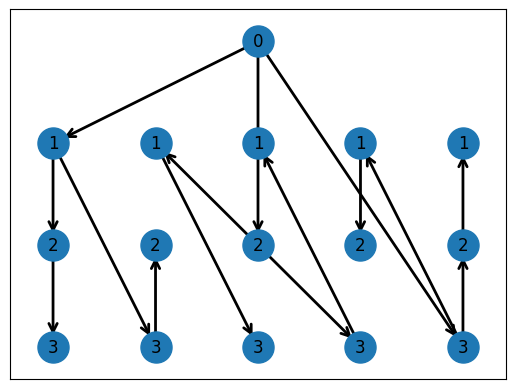

In [21]:
draw_tree(root)